# Training a convnet on a small dataset

# Task

1. Train an image-classification model using very little data
1. Try to use data augmentation to mitigate overfitting

# Steps

1. Download the data from the kaggle.com website
2. Descript the data information
3. Make directories of training dataset
4. Copying images to training, validation, and test directories
5. Count how many pictures are in each training split (train/validation/test)
6. Building Convolutional network
7. Configuring the model for training
8. Image-processing
9. Fitting the model using a batch generator
10. Displaying curves of loss and accuracy during training
11. Predict the class of several picture
12. Conclusion and discussion

## step 1 Downloading the data

Download dataset from www.kaggle.com/c/dogs-vs-cats/data

## Step 2 Building Convolutional network

In [64]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 19, 19, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 9, 128)         0         
__________

## Step 3 Configuring the model for training

In [66]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

## Step 4 Image processing

data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. Currently, the data sits
on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
<ol>
<li> Read the picture files.
<li> Decode the JPEG content to RGB grids of pixels.
<li> Convert these into floating-point tensors.
<li> Rescale the pixel values (between 0 and 255) to the [0, 1] interval
</ol>

In [67]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as pimg
import numpy as np

In [68]:
train_dir = "cat-vs-dog/train"
test_dir = "cat-vs-dog/test"
val_dir = "cat-vs-dog/val"

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Step 5 Fitting the model using a batch generator

In [70]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=25)

Epoch 1/20
100/100 [==============================] - 178s 2s/step - loss: 0.7017 - acc: 0.5094 - val_loss: 0.6926 - val_acc: 0.4913
Epoch 2/20
100/100 [==============================] - 184s 2s/step - loss: 0.6947 - acc: 0.5662 - val_loss: 0.6538 - val_acc: 0.6481
Epoch 3/20
100/100 [==============================] - 174s 2s/step - loss: 0.6442 - acc: 0.6281 - val_loss: 0.6533 - val_acc: 0.6000
Epoch 4/20
100/100 [==============================] - 172s 2s/step - loss: 0.6337 - acc: 0.6488 - val_loss: 0.5850 - val_acc: 0.6967
Epoch 5/20
100/100 [==============================] - 161s 2s/step - loss: 0.6184 - acc: 0.6584 - val_loss: 0.5929 - val_acc: 0.6737
Epoch 6/20
100/100 [==============================] - 163s 2s/step - loss: 0.5967 - acc: 0.6844 - val_loss: 0.5841 - val_acc: 0.7019
Epoch 7/20
100/100 [==============================] - 223s 2s/step - loss: 0.5838 - acc: 0.6963 - val_loss: 0.5840 - val_acc: 0.7062
Epoch 8/20
100/100 [==============================] - 284s 3s/step - 

## Step 6 Displaying curves of loss and accuracy during training

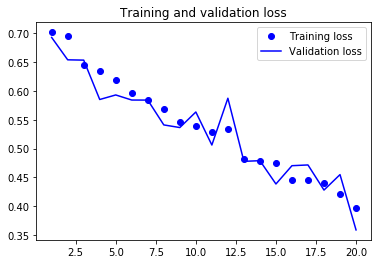

In [71]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

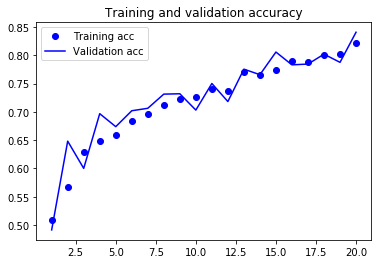

In [118]:
loss = history.history['acc']
val_loss = history.history['val_acc']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Step 7 Predict the class of several picture

<b>download some pictures from web and fed them to the neural network.<br><br>
compare the results of classification.</b>

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [108]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        "test",
        target_size=(100, 100),
        batch_size=32,
        class_mode=None)

Found 6 images belonging to 1 classes.


In [114]:
pre = model.predict_generator(test_generator, steps=len(test_generator))

In [115]:
pre

array([[0.9939421 ],
       [0.02559585],
       [0.001808  ],
       [0.8131097 ],
       [0.02767473],
       [0.93884593]], dtype=float32)

In [111]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = pimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img[...,:3])
    return images
imgs = load_images("test/test")
len(imgs)

6

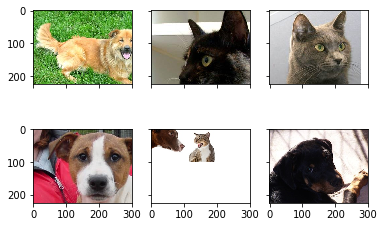

In [112]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True)
k=0
for i in range(2):
    for j in range(3):
        axes[i,j].imshow(imgs[k])
        k += 1

In [117]:
for i, v in enumerate(pre):
    result = 'cat' if v < 0.8 else 'dog'
    print('image {}: is a {}'.format(i+1,result))

image 1: is a dog
image 2: is a cat
image 3: is a cat
image 4: is a dog
image 5: is a cat
image 6: is a dog
